In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import pandas
import numpy
import seaborn
from keras import *
import keras
import sklearn
from sklearn.datasets import make_blobs,make_moons
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model,ensemble
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans,MeanShift,AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import silhouette_score,calinski_harabaz_score,r2_score,mean_absolute_error
from sklearn.metrics.pairwise import euclidean_distances,cosine_distances,manhattan_distances

Using TensorFlow backend.


In [0]:
#read data
train=pandas.read_csv("/content/drive/My Drive/MontrealLocalTV/data.csv")
train=pandas.DataFrame(train)
test=pandas.read_csv("/content/drive/My Drive/MontrealLocalTV/test.csv")
test=pandas.DataFrame(test)

In [0]:
#delete some columns
train_new=train.drop(columns=["Unnamed: 0","Episode","Start_time","End_time","Name of episode","Temperature in Montreal during episode"])
test_new=test.drop(columns=["Unnamed: 0","Episode","Start_time","End_time","Name of episode","Temperature in Montreal during episode"])

In [0]:
#change object feature to numeric in train and test data
for col in train_new.columns:
  if col != "Market Share_total" and col != "Year" and col != "Length":
    train_new[col] = pandas.factorize(train_new[col])[0]

for col in test_new.columns:
  if col != "Market Share_total" and col != "Year" and col != "Length":
    test_new[col] = pandas.factorize(test_new[col])[0]

In [0]:
#label
label = train_new.pop("Market Share_total")

In [7]:
#the head of data after normal
Standard_Scaler = sklearn.preprocessing.StandardScaler()
train_normalizerd = Standard_Scaler.fit_transform(train_new)
train_normalizerd=pandas.DataFrame(train_normalizerd,columns=train_new.columns, index=train_new.index)
train_normalizerd.head()

,Station,Channel Type,Season,Year,Date,Day of week,Length,Name of show,Genre,First time or rerun,# of episode in the season,Movie?,Game of the Canadiens during episode?
0,-1.704273,-2.576988,-0.996422,-1.838599,-1.74949,-1.49351,0.903778,-0.937988,-1.404569,-0.169323,-0.132593,-0.101491,-0.289909
1,-1.704273,-2.576988,-0.996422,-1.838599,-1.74949,-1.49351,-0.226878,-0.937394,-1.261063,-0.169323,-0.132593,-0.101491,-0.289909
2,-1.704273,-2.576988,-0.996422,-1.838599,-1.74949,-1.49351,-0.226878,-0.936800,-1.117557,-0.169323,-0.132593,-0.101491,-0.289909
3,-1.704273,-2.576988,-0.996422,-1.838599,-1.74949,-1.49351,0.150007,-0.936205,-0.974050,-0.169323,-0.132593,-0.101491,-0.289909
4,-1.704273,-2.576988,-0.996422,-1.838599,-1.74949,-1.49351,-0.226878,-0.935611,-0.830544,-0.169323,-0.132593,-0.101491,-0.289909


In [8]:
#split Train data to train and test
X_train, X_test, Y_train, Y_test=train_test_split(train_normalizerd,label,test_size=0.15, random_state=43)
print("shape of train data : ",X_train.shape)
print("shape of train label : ",Y_train.shape)
print("shape of test data : ",X_test.shape)
print("shape of test label : ",Y_test.shape)


shape of train data :  (524157, 13)
shape of train label :  (524157,)
shape of test data :  (92499, 13)
shape of test label :  (92499,)


In [19]:
model = Sequential()

model.add(layers.Dense(128,input_dim = X_train.shape[1], activation='relu'))

model.add(layers.Dense(200,activation='relu'))
model.add(layers.Dense(200,activation='relu'))
model.add(layers.Dense(200,activation='relu'))

model.add(layers.Dense(1,activation='linear'))

model.compile(loss='mae', optimizer='rmsprop', metrics=['mse','mae'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               1792      
_________________________________________________________________
dense_17 (Dense)             (None, 200)               25800     
_________________________________________________________________
dense_18 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_19 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 201       
Total params: 108,193
Trainable params: 108,193
Non-trainable params: 0
_________________________________________________________________


In [20]:
history=model.fit(X_train,Y_train,epochs=100,validation_split=0.1,shuffle=True,batch_size=128)

Train on 471741 samples, validate on 52416 samples
Epoch 1/100
471741/471741 [==============================] - 13s 28us/step - loss: 1.7455 - mean_squared_error: 10.9775 - mean_absolute_error: 1.7455 - val_loss: 1.6350 - val_mean_squared_error: 10.0696 - val_mean_absolute_error: 1.6350
Epoch 2/100
471741/471741 [==============================] - 13s 27us/step - loss: 1.5260 - mean_squared_error: 8.2011 - mean_absolute_error: 1.5260 - val_loss: 1.5434 - val_mean_squared_error: 8.8942 - val_mean_absolute_error: 1.5434
Epoch 3/100
471741/471741 [==============================] - 12s 26us/step - loss: 1.4614 - mean_squared_error: 7.4497 - mean_absolute_error: 1.4614 - val_loss: 1.4587 - val_mean_squared_error: 7.5572 - val_mean_absolute_error: 1.4587
Epoch 4/100
471741/471741 [==============================] - 13s 27us/step - loss: 1.4223 - mean_squared_error: 7.0077 - mean_absolute_error: 1.4223 - val_loss: 1.4098 - val_mean_squared_error: 6.9483 - val_mean_absolute_error: 1.4098
Epoch 5

In [0]:
model.save('/content/drive/My Drive/MontrealLocalTV/montrealTvDeep.h5')

In [22]:
print("score on test is : ",model.evaluate(X_test,Y_test))
prediction=model.predict(X_test)
print("MSE on test is : ",mean_squared_error(Y_test,prediction))
print("MAE on test is : ",mean_absolute_error(Y_test,prediction))
print("R2 Score on test is : ",r2_score(Y_test,prediction))

92499/92499 [==============================] - 3s 37us/step
score on test is :  [1.22351536770228, 4.724962739371268, 1.22351536770228]
MSE on test is :  4.724962737651274
MAE on test is :  1.223515367119566
R2 Score on test is :  0.803179370008918


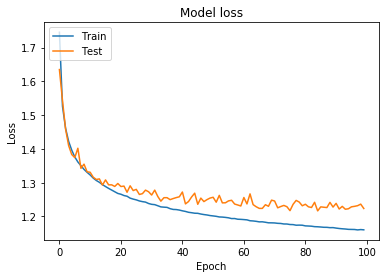

In [24]:
import matplotlib.pyplot as plt


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()